# Simulating Strong Lensing from Superfluid Dark Matter

## Using `PyAutoLens` to simulate the effects of lensing from a linear mass density

In [1]:
# Importing necessary libraries
%matplotlib inline
import autolens as al
import autolens.plot as aplt

In [2]:
# Defining Point-spread function as a Gaussian
psf = al.Kernel2D.from_gaussian(shape_native=(11, 11), sigma=0.1, pixel_scales=0.025)

# The image grid
image_plane_grid = al.Grid2D.uniform(
    shape_native=(100, 100), pixel_scales=0.05, sub_size=2
)

`PyAutoLens` does not provide a `MassProfile` which can be directly used to simulate that of a linear mass density, so I assumed a linear mass density it to be a collection of many `PointMass` profiles

#### The values for parameters were mentioned in [Deep Learning the Morphology of Dark Matter Substructure](https://arxiv.org/pdf/1909.07346.pdf) 

In [3]:
# Defining 21 PointMass profiles
mass_profile_1 = al.mp.PointMass(centre=(0.0, 0.0), einstein_radius=1.2)
mass_profile_2 = al.mp.PointMass(centre=(0.0, 0.1), einstein_radius=1.2)
mass_profile_3 = al.mp.PointMass(centre=(0.0, -0.1), einstein_radius=1.2)
mass_profile_4 = al.mp.PointMass(centre=(0.0, 0.2), einstein_radius=1.2)
mass_profile_5 = al.mp.PointMass(centre=(0.0, -0.2), einstein_radius=1.2)
mass_profile_6 = al.mp.PointMass(centre=(0.0, 0.3), einstein_radius=1.2)
mass_profile_7 = al.mp.PointMass(centre=(0.0, -0.3), einstein_radius=1.2)
mass_profile_8 = al.mp.PointMass(centre=(0.0, 0.4), einstein_radius=1.2)
mass_profile_9 = al.mp.PointMass(centre=(0.0, -0.4), einstein_radius=1.2)
mass_profile_10 = al.mp.PointMass(centre=(0.0, 0.5), einstein_radius=1.2)
mass_profile_11 = al.mp.PointMass(centre=(0.0, -0.5), einstein_radius=1.2)
mass_profile_12 = al.mp.PointMass(centre=(0.0, 0.6), einstein_radius=1.2)
mass_profile_13 = al.mp.PointMass(centre=(0.0, -0.6), einstein_radius=1.2)
mass_profile_14 = al.mp.PointMass(centre=(0.0, 0.7), einstein_radius=1.2)
mass_profile_15 = al.mp.PointMass(centre=(0.0, -0.7), einstein_radius=1.2)
mass_profile_16 = al.mp.PointMass(centre=(0.0, 0.8), einstein_radius=1.2)
mass_profile_17 = al.mp.PointMass(centre=(0.0, -0.8), einstein_radius=1.2)
mass_profile_18 = al.mp.PointMass(centre=(0.0, 0.9), einstein_radius=1.2)
mass_profile_19 = al.mp.PointMass(centre=(0.0, -0.9), einstein_radius=1.2)
mass_profile_20 = al.mp.PointMass(centre=(0.0, 1.0), einstein_radius=1.2)
mass_profile_21 = al.mp.PointMass(centre=(0.0, -1.0), einstein_radius=1.2)

# Lensing Galaxy
lens_galaxy = al.Galaxy(
    redshift=0.5, 
    light=al.lp.SphericalSersic(
        centre=(0.0, 0.0),
        intensity=1.2,
        effective_radius=0.5,
        sersic_index=2.5,
    ),
    mass_1=mass_profile_1, 
    mass_2=mass_profile_2, 
    mass_3=mass_profile_3, 
    mass_4=mass_profile_4, 
    mass_5=mass_profile_5, 
    mass_6=mass_profile_6, 
    mass_7=mass_profile_7, 
    mass_8=mass_profile_8, 
    mass_9=mass_profile_9, 
    mass_10=mass_profile_10, 
    mass_11=mass_profile_11, 
    mass_12=mass_profile_12, 
    mass_13=mass_profile_13,
    mass_14=mass_profile_14, 
    mass_15=mass_profile_15, 
    mass_16=mass_profile_16, 
    mass_17=mass_profile_17,
    mass_18=mass_profile_18, 
    mass_19=mass_profile_19, 
    mass_20=mass_profile_20, 
    mass_21=mass_profile_21
)

In [4]:
source_galaxy = al.Galaxy(
    redshift=1.0, 
    bulge=al.lp.SphericalSersic(
        centre=(0.0, 0.0), 
        intensity=0.8,
        effective_radius=0.5,
        sersic_index=1.5
    )
)

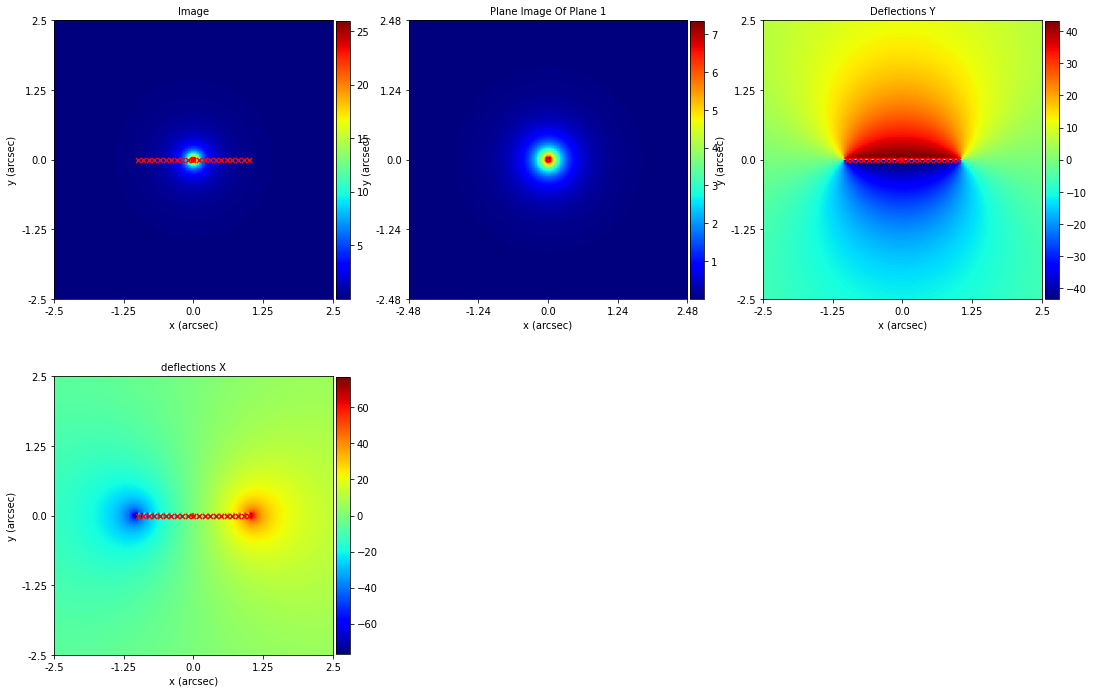

In [6]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])
tracer_plotter = aplt.TracerPlotter(tracer=tracer, grid=image_plane_grid)
tracer_plotter.subplot_tracer()

In [7]:
normal_image = tracer.image_from_grid(grid=image_plane_grid)
padded_image = tracer.padded_image_from_grid_and_psf_shape(
    grid=image_plane_grid, psf_shape_2d=psf.shape_native
)

print(normal_image.shape_native)
print(padded_image.shape_native)

(100, 100)
(110, 110)


In [8]:
simulator = al.SimulatorImaging(
    exposure_time=300.0, psf=psf, background_sky_level=0.1, add_poisson_noise=True
)

imaging = simulator.from_tracer_and_grid(tracer=tracer, grid=image_plane_grid)

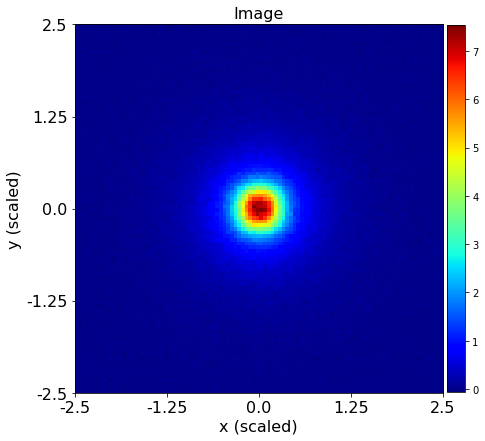

In [9]:
imaging_plotter = aplt.ImagingPlotter(imaging=imaging)
imaging_plotter.figures(image=True)

In [10]:
print("Image:")
print(imaging.image)
print("Noise-Map:")
print(imaging.noise_map)
print("PSF:")
print(imaging.psf)

Image:
[ 1.00093008e-02 -6.25890932e-03  1.08249130e-02 ...  2.41582463e-02
  3.74109068e-03  9.30084151e-06]
Noise-Map:
[0.01914935 0.01767683 0.01922021 ... 0.02034357 0.0185958  0.01825827]
PSF:
[0.00301223 0.00399056 0.00496633 0.00580623 0.00637689 0.00657932
 0.00637689 0.00580623 0.00496633 0.00399056 0.00301223 0.00399056
 0.00528663 0.00657932 0.007692   0.00844801 0.00871618 0.00844801
 0.007692   0.00657932 0.00528663 0.00399056 0.00496633 0.00657932
 0.00818809 0.00957285 0.01051372 0.01084746 0.01051372 0.00957285
 0.00818809 0.00657932 0.00496633 0.00580623 0.007692   0.00957285
 0.0111918  0.01229178 0.01268197 0.01229178 0.0111918  0.00957285
 0.007692   0.00580623 0.00637689 0.00844801 0.01051372 0.01229178
 0.01349988 0.01392842 0.01349988 0.01229178 0.01051372 0.00844801
 0.00637689 0.00657932 0.00871618 0.01084746 0.01268197 0.01392842
 0.01437055 0.01392842 0.01268197 0.01084746 0.00871618 0.00657932
 0.00637689 0.00844801 0.01051372 0.01229178 0.01349988 0.0139284

## Planes

In [11]:
image_plane = al.Plane(galaxies=[lens_galaxy])

In [12]:
deflections = image_plane.deflections_from_grid(grid=image_plane_grid)

print("deflection-angles of `Plane`'s `Grid2D` pixel 0:")
print(deflections.native[0, 0, 0])
print(deflections.native[0, 0, 0])

print("deflection-angles of `Plane`'s `Grid2D` pixel 1:")
print(deflections.native[0, 1, 1])
print(deflections.native[0, 1, 1])

deflection-angles of `Plane`'s `Grid2D` pixel 0:
6.248351991935937
6.248351991935937
deflection-angles of `Plane`'s `Grid2D` pixel 1:
-5.88361843156734
-5.88361843156734


In [13]:
source_plane_grid = image_plane.traced_grid_from_grid(grid=image_plane_grid)
print("Traced source-plane coordinates of `Grid2D` pixel 0:")
print(source_plane_grid.native[0, 0, :])
print("Traced source-plane coordinates of `Grid2D` pixel 1:")
print(source_plane_grid.native[0, 1, :])

Traced source-plane coordinates of `Grid2D` pixel 0:
[-3.76085199  3.40186275]
Traced source-plane coordinates of `Grid2D` pixel 1:
[-3.82170906  3.42111843]


In [14]:
source_plane = al.Plane(galaxies=[source_galaxy])

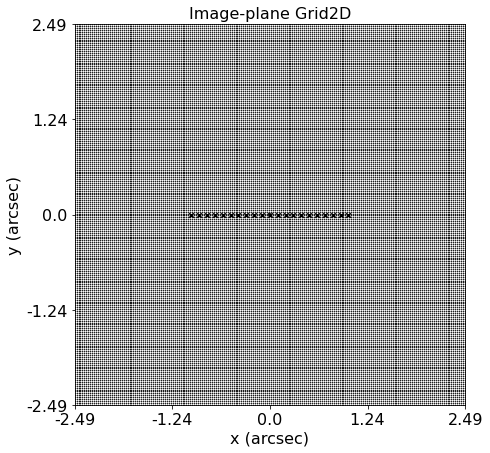

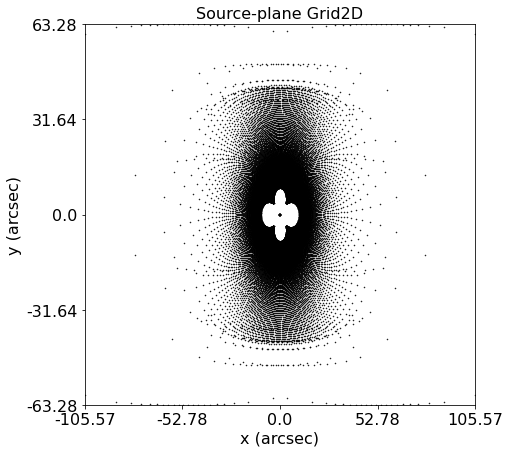

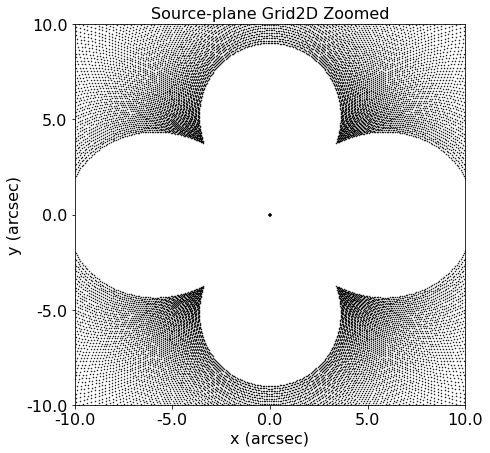

In [16]:
mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Image-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=image_plane, grid=image_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(title=aplt.Title(label="Source-plane Grid2D"))

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)
plane_plotter.figures(plane_grid=True)

mat_plot_2d = aplt.MatPlot2D(
    title=aplt.Title(label="Source-plane Grid2D Zoomed"),
    axis=aplt.Axis(extent=[-10.0, 10.0, -10.0, 10.0]),
)

plane_plotter = aplt.PlanePlotter(
    plane=source_plane, grid=source_plane_grid, mat_plot_2d=mat_plot_2d
)

plane_plotter.figures(plane_grid=True)

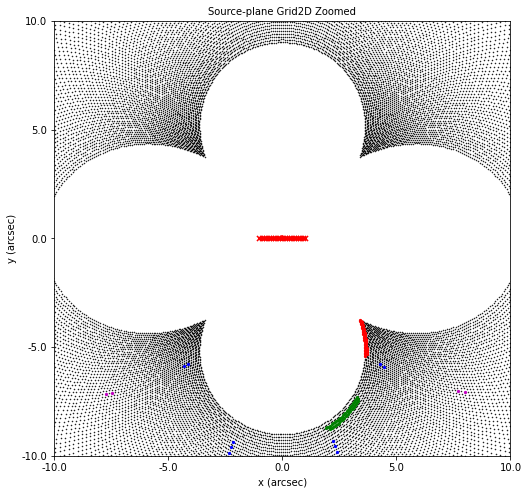

In [17]:
visuals_2d = aplt.Visuals2D(
    indexes=[
        range(0, 50),
        range(500, 550),
        [1350, 1450, 1550, 1650, 1750, 1850, 1950, 2050, 2150, 2250],
        [6250, 8550, 8450, 8350, 8250, 8150, 8050, 7950, 7850, 7750],
    ]
)

plane_plotter = aplt.PlanePlotter(
    plane=image_plane,
    grid=image_plane_grid,
    visuals_2d=visuals_2d,
    mat_plot_2d=mat_plot_2d,
)
plane_plotter.subplot_with_source_grid()